In [3]:
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8, 6)
import matplotlib.pyplot as plt
import numpy as np
import GPy
from OX_database import DissolvedOxygenDatabase
from IPython.display import display

In [4]:
path = "/home/rodrigo/ml_prob/DissolvedOxygenPrediction/database/"
sequence_size = 3
train_prop = 0.75
first_day = [2007, 7, 1]

database = DissolvedOxygenDatabase(database_path=path,
                                   sequence_size=3,
                                   train_prop=train_prop,
                                   sequence_batch_size=50,
                                   start_date=first_day)

loading Dissolved_Oxygen
loading Temperature
loading pH
loading Electrical_Conductivity
loading River_Discharge


In [5]:
train_input, train_target, train_days = database.next_batch(batch_size="all")
test_input, test_target, test_days = database.next_batch(set="test")
print(train_target.shape, train_days.shape)

((1661,), (1661,))


In [6]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)

In [8]:
m = GPy.models.GPRegression(train_days[..., np.newaxis], train_target[..., np.newaxis], kernel)

 /usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


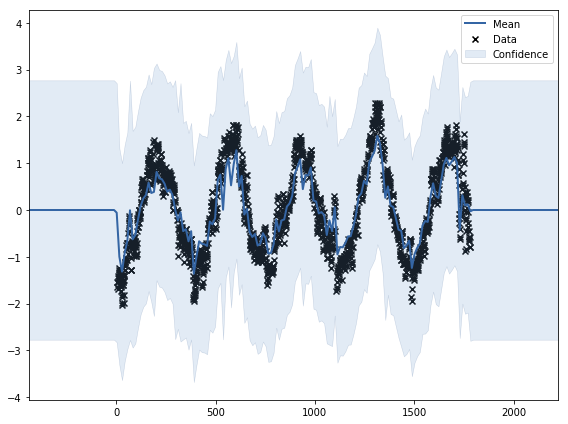

In [9]:
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

In [11]:
m.optimize(messages=True)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [12]:
m.optimize_restarts(num_restarts=5)

Optimization restart 1/5, f = -440.497992216


Optimization restart 2/5, f = -440.497992216


Optimization restart 3/5, f = -440.497992216


Optimization restart 4/5, f = -440.497992216


Optimization restart 5/5, f = -440.497992216


GP_regression.,value,constraints,priors
rbf.variance,0.570308166453,+ve,
rbf.lengthscale,3.43803036962,+ve,
Gaussian_noise.variance,0.00731667200938,+ve,


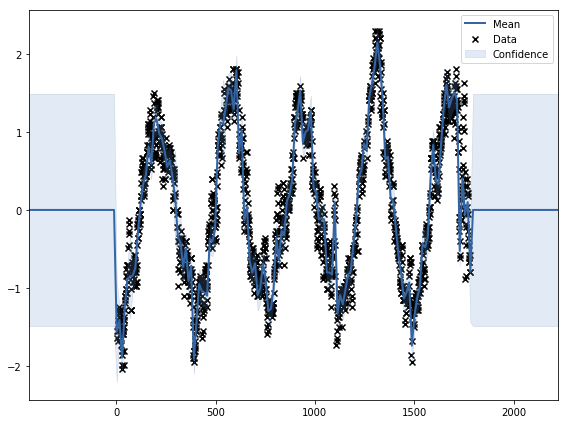

In [13]:
display(m)
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')